<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [10]:
%pwd

'/Users/jenniferquigley/DS22/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [86]:
import pandas as pd

In [95]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv("https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv")
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [96]:
# Cleaning Data The Long Way First For Understanding

In [97]:
shops.coffee_shop_name.value_counts().sum()

7616

In [98]:
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda text: text.lower())

In [99]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda text: text.lower())

In [100]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating


In [101]:
text_example = shops['full_review_text'][1]

In [102]:
text_example

' 12/2/2016 listed in date night: austin, ambiance in austin beautiful!!!! love the ambiance! instagram-worthy!!!  definitely $$$, so be prepared. this is gonna cost you a pretty penny :) waffle dessert was just decent...nothing to rave about.  but, will probably be back just to be somewhere unique and nice. '

In [103]:
import re

In [137]:
def clean_text(text):
    """
    Remove all punctuation.
    Lowercase all text.
    Remove numbers.
    """
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub('[^a-z ]', '', text)
    #What is '' doing??
    
    # splits tokens
    text = text.split(" ")
    
    # return list
    tokens = list(text)
    
    return tokens

In [138]:
clean_text(text_example)

['',
 '',
 'listed',
 'in',
 'date',
 'night',
 'austin',
 'ambiance',
 'in',
 'austin',
 'beautiful',
 'love',
 'the',
 'ambiance',
 'instagramworthy',
 '',
 'definitely',
 '',
 'so',
 'be',
 'prepared',
 'this',
 'is',
 'gonna',
 'cost',
 'you',
 'a',
 'pretty',
 'penny',
 '',
 'waffle',
 'dessert',
 'was',
 'just',
 'decentnothing',
 'to',
 'rave',
 'about',
 '',
 'but',
 'will',
 'probably',
 'be',
 'back',
 'just',
 'to',
 'be',
 'somewhere',
 'unique',
 'and',
 'nice',
 '']

In [106]:
shops["tokens"] = shops["full_review_text"].apply(lambda text: clean_text(text))

In [107]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [108]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_lg')

In [109]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[, , , checkin, love, love, loved, the, atmosp..."
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[, , listed, in, date, night, austin, ambiance..."


In [110]:
# Looking at number of star ratings

shops_ratings = shops.star_rating.value_counts().to_frame().reset_index()
shops_ratings.head()

,index,star_rating
0,5.0 star rating,3780
1,4.0 star rating,2360
2,3.0 star rating,738
3,2.0 star rating,460
4,1.0 star rating,278


In [111]:
# recreating the long way of doing this for practice & understanding

def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')
    
    # percent of docs that a token appears in
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [112]:
wc  = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,,7616,52191,1.0,0.063748,0.063748,1.000000
22,the,6847,34809,2.0,0.042517,0.106264,0.899028
1,and,6864,26651,3.0,0.032552,0.138816,0.901261
19,a,6246,22756,4.0,0.027795,0.166611,0.820116
12,i,5532,20249,5.0,0.024733,0.191344,0.726366


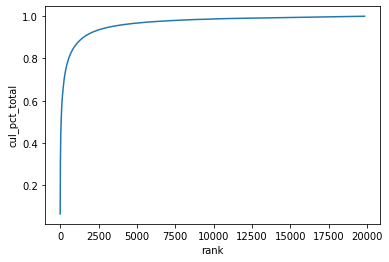

In [113]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

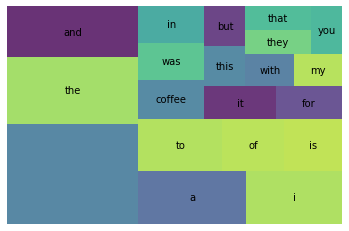

In [114]:
# Before I cleaned the data...

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [139]:
STOP_WORDS = nlp.Defaults.stop_words.union(['little', 'love', '1', 'nice', 'great', ' '])

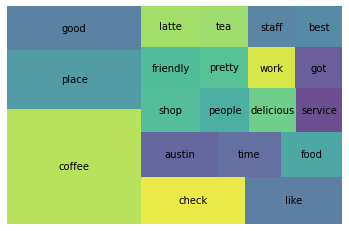

In [154]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

# pass tokens through count function
wc = count(shops['tokens'])

# sort and keep the top 20 words
wc_top20 = wc[wc['rank'] <= 20]

# plot the stats
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [152]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19584,roomier,1,1,19585.0,0.000003,0.999989,0.000131
19583,windowed,1,1,19586.0,0.000003,0.999992,0.000131
19586,actuality,1,1,19587.0,0.000003,0.999994,0.000131
19585,crass,1,1,19588.0,0.000003,0.999997,0.000131
19587,digestion,1,1,19589.0,0.000003,1.000000,0.000131


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [161]:
# Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. 
# A 'good' coffee shop is a 4 or 5

shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[11/25/2016, check, loved, atmosphere, corner,..."
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[12/2/2016, listed, date, night, austin, ambia..."


In [181]:
shops['star_rating'].dtypes

dtype('O')

In [209]:
good_shops = shops[(shops['star_rating']==' 5.0 star rating ') | (shops['star_rating']==' 4.0 star rating ')]

In [210]:
bad_shops = shops[(shops['star_rating']==' 1.0 star rating ') | (shops['star_rating']==' 2.0 star rating ') | (shops['star_rating']==' 3.0 star rating ')]

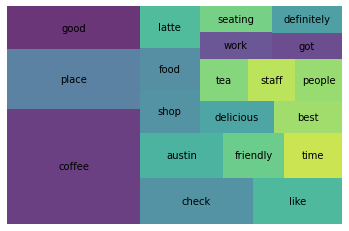

In [213]:
# pass tokens through count function
wc_good = count(good_shops['tokens'])

# sort and keep the top 20 words
wc_top20_good = wc_good[wc_good['rank'] <= 20]

# plot the stats
squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

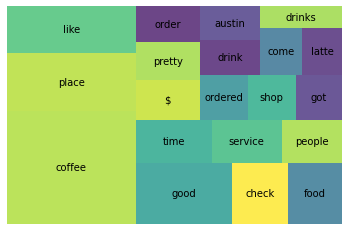

In [214]:
# pass tokens through count function
wc_bad = count(bad_shops['tokens'])

# sort and keep the top 20 words
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

# plot the stats
squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [215]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,coffee,947,2164,1.0,0.027333,0.027333,0.641599
9,place,721,1116,2.0,0.014096,0.041428,0.488482
20,like,569,886,3.0,0.011191,0.052619,0.385501
7,good,596,880,4.0,0.011115,0.063734,0.403794
57,check,475,505,5.0,0.006378,0.070112,0.321816


In [216]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,coffee,3964,8375,1.0,0.029927,0.029927,0.645603
97,place,2944,4328,2.0,0.015465,0.045392,0.479479
187,good,2196,3106,3.0,0.011099,0.056491,0.357655
25,check,2654,2852,4.0,0.010191,0.066682,0.432248
200,like,1573,2239,5.0,0.008001,0.074683,0.256189


In [220]:
bad_good = wc_bad.merge(wc_good, how = 'outer', on = 'word')
bad_good.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,coffee,947.0,2164.0,1.0,0.027333,0.027333,0.641599,3964.0,8375.0,1.0,0.029927,0.029927,0.645603
1,place,721.0,1116.0,2.0,0.014096,0.041428,0.488482,2944.0,4328.0,2.0,0.015465,0.045392,0.479479
2,like,569.0,886.0,3.0,0.011191,0.052619,0.385501,1573.0,2239.0,5.0,0.008001,0.074683,0.256189
3,good,596.0,880.0,4.0,0.011115,0.063734,0.403794,2196.0,3106.0,3.0,0.011099,0.056491,0.357655
4,check,475.0,505.0,5.0,0.006378,0.070112,0.321816,2654.0,2852.0,4.0,0.010191,0.066682,0.432248


In [230]:
# looked at all the empty cells
bad_good[bad_good.isna().any(axis=1)]

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y


In [229]:
# filled empty cells with zeros
bad_good = bad_good.fillna(0)

In [231]:
bad_good['difference']=abs(bad_good['appears_in_pct_x'] - bad_good['appears_in_pct_y'])

In [248]:
bad_good = bad_good.sort_values(by=['difference'], ascending=False)
bad_good = bad_good.head(10)

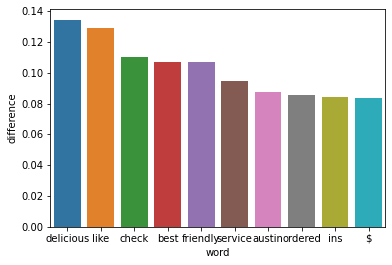

In [251]:
ax = sns.barplot(x="word", y="difference", data=bad_good)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

